**Remarks**

In this part, learn we about dataset [Amazon Baby](https://www.kaggle.com/roopalik/amazon-baby-dataset). Let's we use traditional classification without applying NLP process.

In [1]:
# call the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!cmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d roopalik/amazon-baby-dataset

/bin/bash: cmod: command not found
 93% 17.0M/18.2M [00:00<00:00, 25.9MB/s]
100% 18.2M/18.2M [00:00<00:00, 26.7MB/s]


In [2]:
# unzipping dataset 
!unzip "amazon-baby-dataset.zip"

Archive:  amazon-baby-dataset.zip
  inflating: reviews_Baby_5_final_dataset.csv  


In [16]:
# showing dataset
import pandas as pd
data = pd.read_csv("reviews_Baby_5_final_dataset.csv")
data = data[['reviewerName ', 'reviewText', 'overall']]
data.head(3)

,reviewerName,reviewText,overall
0,Jakell,This book is perfect! I'm a first time new mo...,5
1,MAPN,I use this so that our babysitter (grandma) ca...,5
2,"R. Davidson ""Jrdpa""","I like this log, but think it would work bette...",3


In [18]:
# describe dataset
print("Shape of dataframe", data.shape)

Shape of dataframe (56950, 3)


In [23]:
# Word Count Vector for each review
# in this part, we don't dive in more NLP techniques
data['word_count'] = data['reviewText'].str.split().str.len()
data['unique'] = data['reviewText'].value_counts()
data.head(3)

,reviewerName,reviewText,overall,word_count
0,Jakell,This book is perfect! I'm a first time new mo...,5,46
1,MAPN,I use this so that our babysitter (grandma) ca...,5,148
2,"R. Davidson ""Jrdpa""","I like this log, but think it would work bette...",3,59


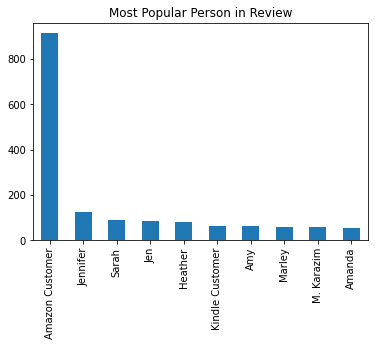

In [32]:
import matplotlib.pyplot as plt

plt.title("Most Popular Person in Review")
data['reviewerName '].value_counts().head(10).plot(kind='bar');

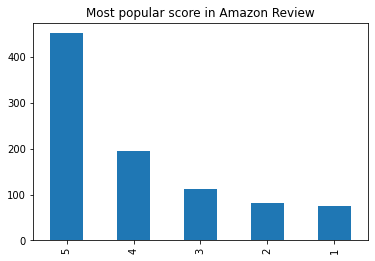

In [36]:
# explore Amazon Customer
amazon_cust = data[data['reviewerName ']=='Amazon Customer']
plt.title('Most popular score in Amazon Review')
amazon_cust['overall'].value_counts().plot(kind='bar');

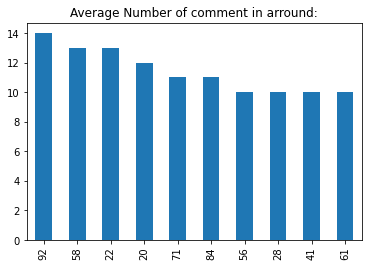

In [41]:
plt.title("Average Number of comment in arround:")
amazon_cust['word_count'].value_counts().head(10).plot(kind='bar');

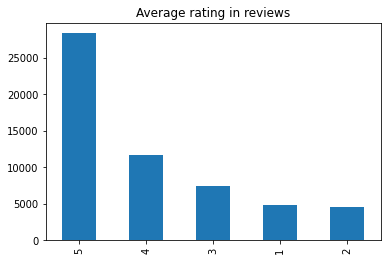

In [44]:
# build sentiment classifier
y = data.overall
plt.title("Average rating in reviews")
y.value_counts().plot(kind='bar');

In [45]:
# define what's positive and negative sentiment
# ignore all 3*review
data = data[data['overall'] != 3]

In [50]:
# positive sentimen = 4* or 5*
data['sentiment'] = data.loc[:, ('overall')].apply(lambda x:'Positive' if x in (4,5) else 'Negative')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
data.head()

,reviewerName,reviewText,overall,word_count,sentiment
0,Jakell,This book is perfect! I'm a first time new mo...,5,46,Positive
1,MAPN,I use this so that our babysitter (grandma) ca...,5,148,Positive
4,EmilyS,I have used this book since my son was born. ...,5,117,Positive
5,John Ramahlo Jr.,THis has been helpful in tracking the feedings...,4,139,Positive
6,K. Kadrmas,if I didn't suck at documenting. Not sure exac...,4,70,Positive


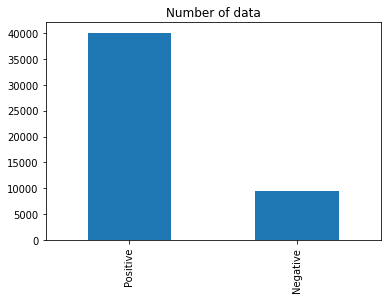

In [57]:
plt.title('Number of data')
data.sentiment.value_counts().plot(kind='bar');